In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import Training Data

In [2]:
df_train = pd.read_csv("train.csv")
df_train.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

Save training results seperately

In [3]:
df_train_result = df_train[['target', 'standard_error']].copy()
df_train_result.head()

,target,standard_error
0,-0.340259,0.464009
1,-0.315372,0.480805
2,-0.580118,0.476676
3,-1.054013,0.450007
4,0.247197,0.510845


Drop url, licese, and the training results

In [4]:
# URL and license are mostly empty we can intuitively know they won't have any siginificance
# We want to focus on the texts only

df_train = df_train.drop(['url_legal', 'license', 'target', 'standard_error'], axis=1)
df_train.head()

,id,excerpt
0,c12129c31,When the young people returned to the ballroom...
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh..."
2,b69ac6792,"As Roger had predicted, the snow departed as q..."
3,dd1000b26,And outside before the palace a great garden w...
4,37c1b32fb,Once upon a time there were Three Bears who li...


General analysis of the data

In [5]:
text_length = df_train['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length.describe())

--- Distribution of the Total Data Text Length ---

count    2834.000000
mean      171.654905
std        16.997129
min       125.000000
25%       158.000000
50%       173.000000
75%       186.000000
max       205.000000
Name: excerpt, dtype: float64


Plot of the distribution

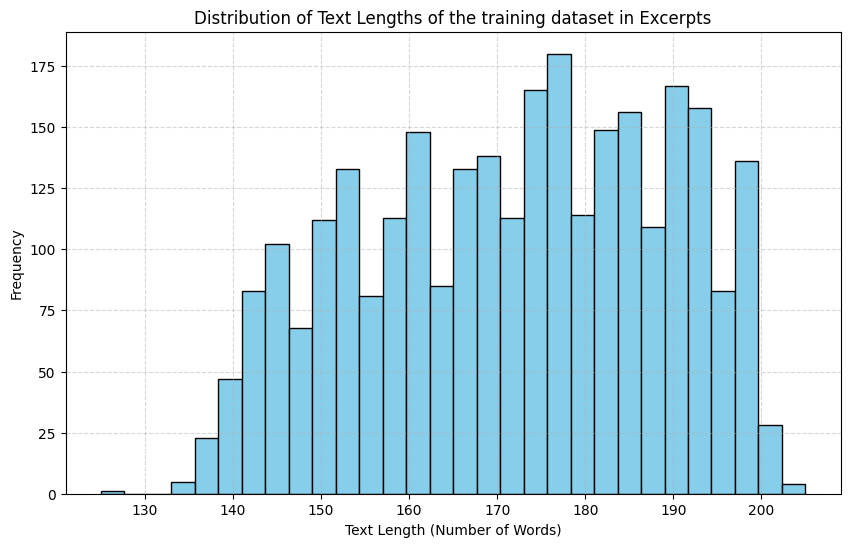

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the training dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Import Testing Data

In [11]:
df_test = pd.read_csv("test.csv")
df_test.columns

Index(['id', 'url_legal', 'license', 'excerpt'], dtype='object')

Drop url and license columns

In [ ]:
# Same as for the training dataset drop the insignificant columns

df_test = df_test.drop(['url_legal', 'license'], axis = 1)
df_test.head()

,id,excerpt
0,c0f722661,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,It was a bright and cheerful scene that greete...
3,04caf4e0c,Cell division is the process by which a parent...
4,0e63f8bea,Debugging is the process of finding and resolv...


Analysis and plot of the data

In [13]:
text_length_test = df_test['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length_test.describe())

--- Distribution of the Total Data Text Length ---

count      7.000000
mean     164.142857
std       13.094892
min      147.000000
25%      154.500000
50%      167.000000
75%      173.500000
max      179.000000
Name: excerpt, dtype: float64


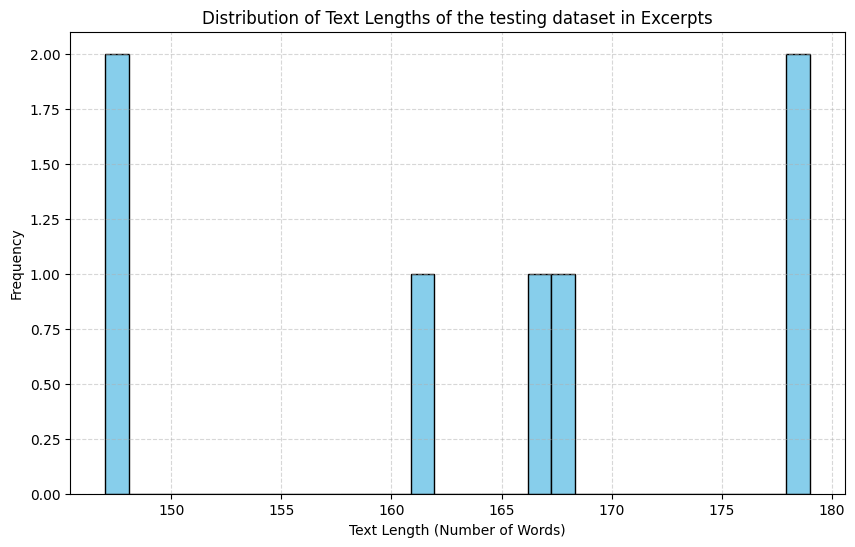

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(text_length_test, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the testing dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()